In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter

%matplotlib inline

In [101]:
# run beta-skeleton on two separate hemispheres
cut_file = "galaxies_south_cut_Vhel_pos.txt"
beta = 2.0
skel = "/Users/forero/github/abacus/nb/./LSS_BSK_calc"
data_path = "../cosmicflows/"
in_filename = os.path.join(data_path, "cuts", cut_file)
out_filename = in_filename.split('/')[-1].replace("galaxies", "beta_{:.1f}_galaxies".format(beta))
beta_filename = os.path.join('xdl_beta_skeleton',out_filename+'.BSKIndex')
cmd = "{} -input {} -output {} -beta {} -printinfo True -numNNB 350".format(skel, in_filename, out_filename, beta)
#print(cmd)
os.system(cmd)
print(in_filename)
print(out_filename)
print(beta_filename)

../cosmicflows/cuts/galaxies_south_cut_Vhel_pos.txt
beta_2.0_galaxies_south_cut_Vhel_pos.txt
xdl_beta_skeleton/beta_2.0_galaxies_south_cut_Vhel_pos.txt.BSKIndex


In [102]:
# read data points
data = np.loadtxt(in_filename)
full_in_filename = in_filename.replace('_pos.txt', '.hdf5')

print(full_in_filename)
f = h5py.File(full_in_filename, 'r')
pgc = f['pgc'][:]
kmag = f['K_t'][:]
posx = f['SGX'][:]
posy = f['SGY'][:]
posz = f['SGZ'][:]
vhel = f['Vhel'][:]
f.close()

n_points = len(data)
points_id = np.arange(n_points) 

# Read beta skeleton data
beta_data = np.int_(np.loadtxt(beta_filename))

# Flattend and count links
beta_data_flat = beta_data.flatten()
beta_link_count = Counter(Counter(beta_data_flat).values())

# Count how many points have zero links
unique_beta_id = len(set(beta_data_flat))
if (n_points - unique_beta_id)>0:
    beta_link_count[0] = n_points - unique_beta_id

print(beta_link_count)


../cosmicflows/cuts/galaxies_south_cut_Vhel.hdf5
Counter({0: 1969, 1: 68, 2: 46, 3: 34, 4: 8})


In [103]:
# find unique pairs
ids, counts = np.unique(beta_data_flat, return_counts=True)
unique_ids = ids[counts==1]
print(unique_ids)
for i in unique_ids:
    if i in beta_data[:,0]:
        ii = (beta_data[:,0]==i)
        par = beta_data[ii,1][0]
        #print(i, par, beta_data[ii])
        if par in unique_ids:
            print("0", beta_data[ii])
        
    if i in beta_data[:,1]:
        ii = (beta_data[:,1]==i)
        par = beta_data[ii,0][0]
        if par in unique_ids:
            print("1", beta_data[ii])

[   7   17   21   27   65   82   85   86   91   93  104  111  127  131
  132  136  143  144  160  169  185  205  216  251  292  333  460  670
 1233 1315 1463 1473 1483 1509 1510 1513 1530 1536 1540 1543 1545 1549
 1555 1560 1622 1623 1668 1680 1704 1799 1801 1804 1812 1818 1826 1886
 1968 1983 2001 2051 2063 2066 2067 2070 2074 2079 2082 2103]
0 [[  17 2103]]
1 [[  17 2103]]


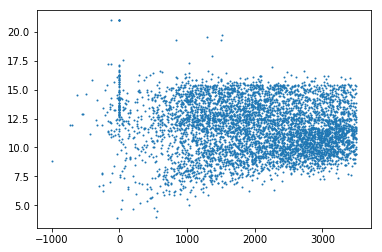

In [90]:
plt.scatter(vhel, kmag, s=1.0)